In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline
#1 Read/load data
def read_data(filename):
    '''
    Input:
        filename (string): name of the file with the words

    Returns:
        pandas dataframe
    '''
    if '.csv' in filename:
        df = pd.read_csv(filename, index_col = 0)
        print(filename + " is sucessfully loaded")
        return df

    elif '.xls' in filename or '.xlsx' in filename:
        df = pd.read_excel(filename, index_col = 0)
        print(filename + " is sucessfully loaded")
        return df

    elif '.json' in filename:
        df = pd.read_json(filname)
        print(filename + " is sucessfully loaded")
        return df
    
    else:
        print("This func takes .csv/.json/.xls/.xlsx files" )

In [15]:
booking = read_data("jocojimsjailbooking_hashed_201805101838.csv")

jocojimsjailbooking_hashed_201805101838.csv is sucessfully loaded


In [16]:
booking.head()

,case_no,case_type,booking_no,arresting_agency,arresting_agency_type,booking_date,release_date,bail_type,bail_amt,bailed_out
mni_no,,,,,,,,,,
14,10CR01713,CR,10009085,OLATHE P.D.,CITY,2010-07-17 00:00:00,2010-07-19 00:00:00,PR,2500.0,True
180,10CR03181,CR,11000380,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,2011-01-08 00:00:00,2011-01-08 00:00:00,SUR,3500.0,True
180,11CR01075,CR,11006324,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,2011-05-25 00:00:00,2011-05-25 00:00:00,SUR,3500.0,True
216,11CR01981,CR,11010993,OLATHE P.D.,CITY,2011-09-05 00:00:00,2011-09-05 00:00:00,SUR,3500.0,True
216,13CR00242,CR,13001266,OLATHE P.D.,CITY,2013-01-30 00:00:00,2013-03-05 00:00:00,PR,3500.0,True


In [17]:
#Convert column type from string to datetime
booking['booking_date'] = pd.to_datetime(booking['booking_date'])
booking['release_date'] = pd.to_datetime(booking['release_date'])
booking['days'] = booking['release_date'] - booking['booking_date']

In [18]:
#Convert the days type to integer 
booking['days'] = booking['days'].astype('timedelta64[D]')

In [19]:
booking.columns

Index(['case_no', 'case_type', 'booking_no', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'release_date', 'bail_type',
       'bail_amt', 'bailed_out', 'days'],
      dtype='object')

In [20]:
booking['days'].describe()

count    28208.000000
mean        28.112131
std         75.449663
min          0.000000
25%          0.000000
50%          1.000000
75%         15.000000
max       1390.000000
Name: days, dtype: float64

In [21]:
booking['bail_amt'].describe()

count     22316.000000
mean       5096.526089
std       10810.513915
min           0.000000
25%        1500.000000
50%        2500.000000
75%        5000.000000
max      500000.000000
Name: bail_amt, dtype: float64

In [9]:
booking['case_type'].unique()

array(['CR', 'DV', 'JV'], dtype=object)

In [10]:
booking['bail_type'].unique()

array(['PR', 'SUR', nan, 'ORCD', 'GPS', 'CA', 'PPS'], dtype=object)

In [11]:
booking['arresting_agency'].unique()

array(['OLATHE P.D.', "JOHNSON COUNTY SHERIFF'S DEPARTMENT",
       'OVERLAND PARK P.D.', 'MISSION P.D.', 'GARDNER P.D.',
       'LENEXA P.D.', 'SPRING HILL P.D.', 'MERRIAM P.D.', 'SHAWNEE P.D.',
       'KANSAS HIGHWAY PATROL', 'FAIRWAY P.D.', 'PRAIRIE VILLAGE P.D.',
       'LEAWOOD P.D.', 'WESTWOOD P.D.', 'OTHER AGENCY',
       'ROELAND PARK P.D.', 'JOHNSON COUNTY PARK PATROL',
       'LAKE QUIVIRA P.D.', 'BLUE VALLEY HIGH CAMPUS P.D.',
       'SHAWNEE MISSION SCHOOL SECURITY', nan], dtype=object)

In [12]:
booking['arresting_agency_type'].unique()

array(['CITY', 'COUNTY SHERIFF', 'STATE', 'OTHER AGENCY',
       'COUNTY PARK DISTRICT', 'SCHOOL', nan], dtype=object)

In [22]:
def Detect_missing_value(df):
    '''
    Find out the columns have missing values

    Input:
        pandas dataframe
 
    Returns:
        a list of those column names
    '''
    rv = []
    for col in df.columns:
        if df[col].count() < df.shape[0]:
            rv.append(col)
            print(col, "has missing values.")
    return rv

In [24]:
cols_to_fill = Detect_missing_value(booking)

arresting_agency has missing values.
arresting_agency_type has missing values.
release_date has missing values.
bail_type has missing values.
bail_amt has missing values.
days has missing values.


In [25]:
#Code based on: https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
def corr_matrix(df):
    '''
    Creates a heatmap that shows the correlations between the different variables in a dataframe.
    
    Input:
        df: a dataframe
        title: name of the correlation_matrix
        
    Return:
        Outputs a heatmatrix showing correlations
    
    
    '''
    f, ax = plt.subplots(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

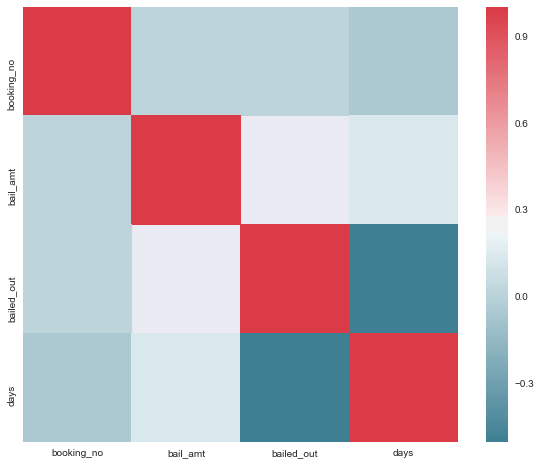

In [28]:
corr_matrix(booking)

In [29]:
def explore(df, var,  y = 'bail_amt'):
    '''
    Generate distribution graph for specific variable
    Input:
        df: pd dataframe
        variable(string): the variable/attribute you want to explore
        graph_typee(string): the type of graph you want to draw
    Return:
        a graph for a selected attribute. 
    '''
    
    var_sum = df[[var, y]].groupby(var).sum()
    var_sum.dropna(axis=0, how='all')
    
    var_mean = df[[var, y]].groupby(var).mean()
    var_mean.dropna(axis=0, how='all')
    
    var_sum.plot(kind='bar', figsize=(8,4), color = 'purple')
    var_mean.plot(kind='line', figsize=(8,4), color = 'green', marker='o', linestyle='--')
    
    plt.title('mean by '+str(var))
    plt.show()

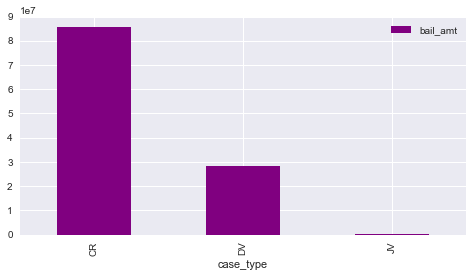

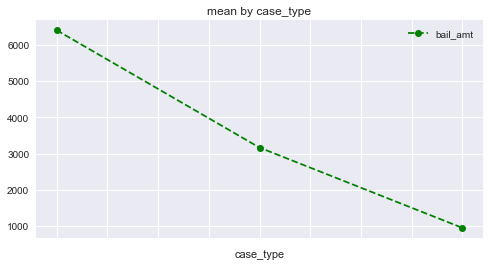

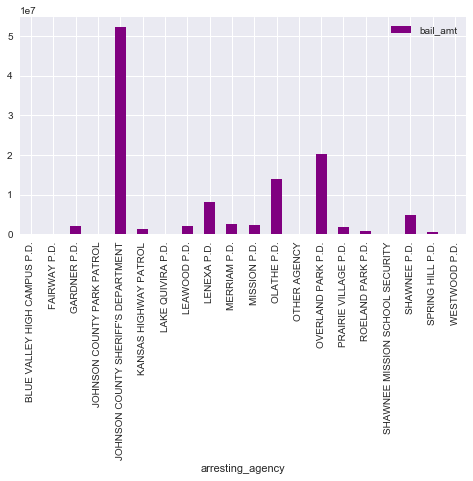

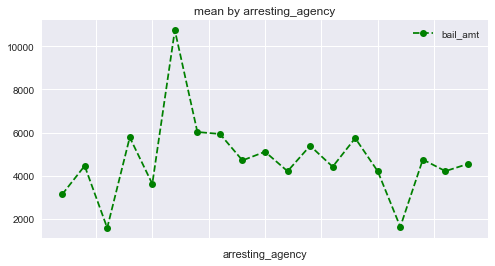

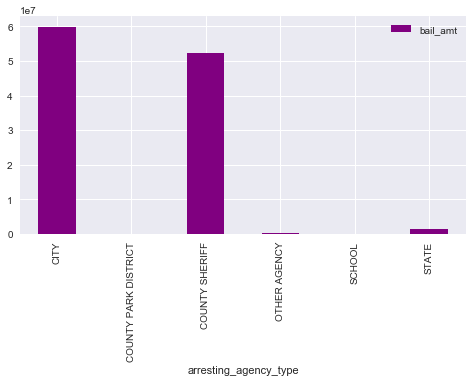

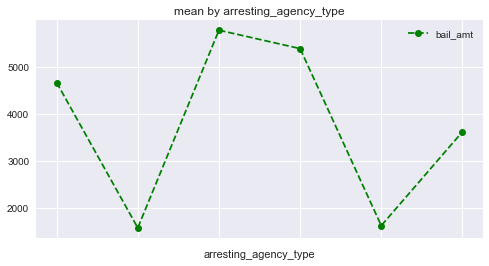

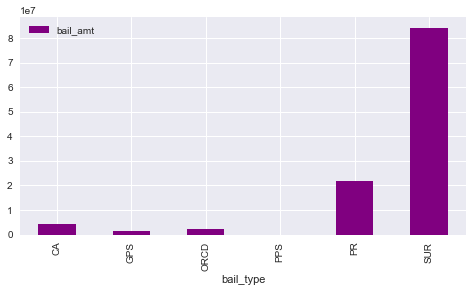

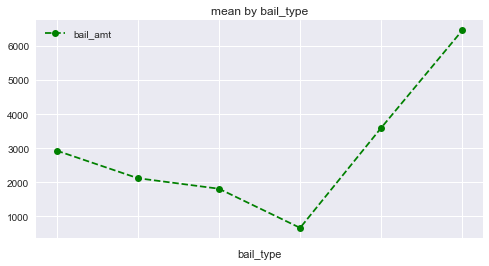

In [83]:
lst = ['case_type', 'arresting_agency','arresting_agency_type', 'bail_type']
for cate in lst:
    explore(booking, cate)

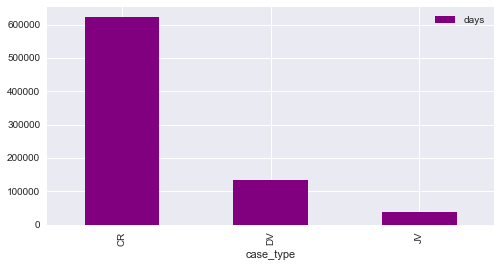

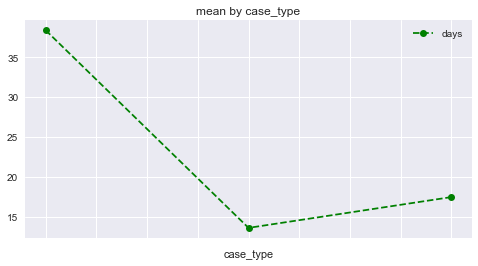

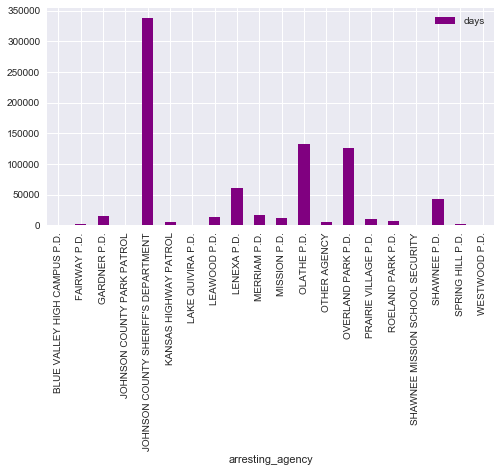

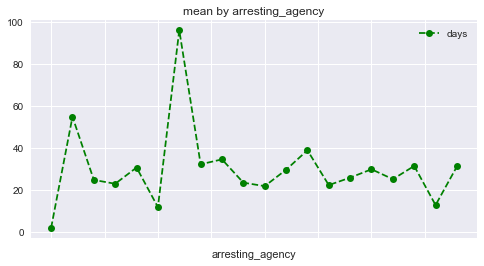

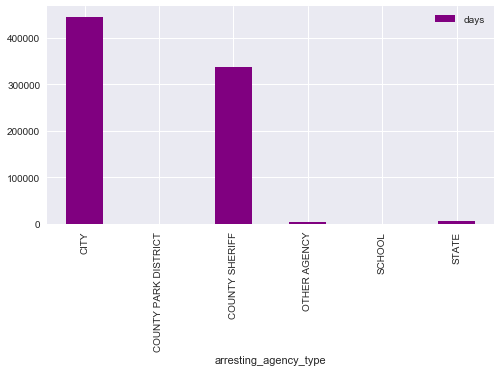

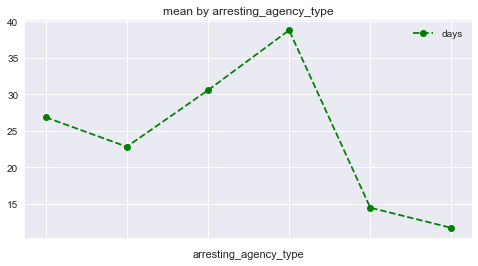

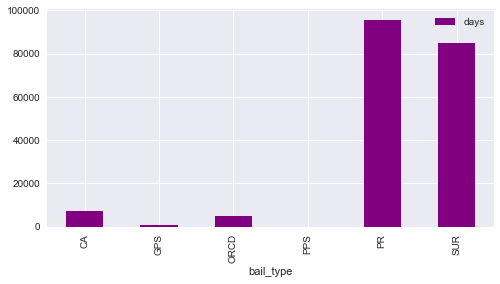

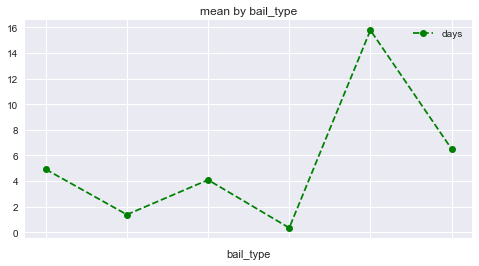

In [30]:
lst = ['case_type', 'arresting_agency','arresting_agency_type', 'bail_type']
for cate in lst:
    explore(booking, cate, y='days')